In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# EDA

In [115]:
df_2018=pd.read_csv("data-2018.csv")
df_2019=pd.read_csv("data-2019.csv")
df_2020=pd.read_csv("data-2020.csv")

df18=df_2018.copy()
df19=df_2019.copy()
df20=df_2020.copy()

In [116]:
print(df18.head())
print(df19.head())
print(df20.head())

   sno  district       mandal      village    lat_gis   long_gis   gwl  \
0    1  ADILABAD     Adilabad     Adilabad  19.668300  78.524700  5.09   
1    2  ADILABAD  Bazarhatnur  Bazarhatnur  19.458888  78.350833  5.10   
2    3  ADILABAD  Gudihatnoor  Gudihatnoor  19.525555  78.512222  4.98   
3    4  ADILABAD      Jainath      Jainath  19.730555  78.640000  5.75   
4    5  ADILABAD      Narnoor      Narnoor  19.495665  78.852654  2.15   

              season    pH   E.C  ...    SO4     Na    K  Ca      Mg  \
0  postmonsoon 2018   8.28   745  ...   46.0   49.0  4.0  48  38.896   
1  postmonsoon 2018   8.29   921  ...   68.0   42.0  5.0  56  63.206   
2  postmonsoon 2018   7.69   510  ...   44.0   45.0  2.0  24  38.896   
3  postmonsoon 2018   8.09   422  ...   35.0   27.0  1.0  32  19.448   
4  postmonsoon 2018   8.21  2321  ...  280.0  298.0  5.0  56  92.378   

          T.H       SAR  Classification  RSC  meq  / L  Classification.1  
0  279.934211  1.273328            C2S1      -1

In [117]:
df18.info()
df19.info()
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               374 non-null    int64  
 1   district          374 non-null    object 
 2   mandal            374 non-null    object 
 3   village           374 non-null    object 
 4   lat_gis           374 non-null    float64
 5   long_gis          374 non-null    float64
 6   gwl               371 non-null    float64
 7   season            374 non-null    object 
 8   pH                374 non-null    float64
 9   E.C               374 non-null    int64  
 10  TDS               374 non-null    float64
 11  CO3               374 non-null    int64  
 12  HCO3              374 non-null    float64
 13  Cl                374 non-null    int64  
 14  F                 374 non-null    float64
 15  NO3               374 non-null    float64
 16  SO4               374 non-null    float64
 1

In [118]:
df20 = df20.drop(columns=['Unnamed: 8'])
# Cette colonne est vide, donc on supprime

#### Anomalies

In [119]:
for i in range (len(df18.columns)):
    if df18.columns[i] != df19.columns[i] != df20.columns[i]:
        print(f"{df18.columns[i]} {df19.columns[i]} {df20.columns[i]}")

E.C EC E.C
CO3 CO_-2  CO3
HCO3 HCO_ -  HCO3
Cl Cl - Cl
F F - F
NO3  NO3-  NO3 
SO4 SO4-2 SO4
Na Na+ Na
K K+ K
Ca Ca+2 Ca
Mg Mg+2 Mg


In [120]:
df19 = df19.rename(columns=dict(zip(df19.columns, df18.columns)))

#### Données dupliquées

In [121]:
df18.duplicated().sum(), df19.duplicated().sum(), df20.duplicated().sum()

(0, 0, 0)

#### Concaténation

In [122]:
df=pd.concat([df18, df19, df20])

In [123]:
print(df.head()) 

   sno  district       mandal      village    lat_gis   long_gis   gwl  \
0    1  ADILABAD     Adilabad     Adilabad  19.668300  78.524700  5.09   
1    2  ADILABAD  Bazarhatnur  Bazarhatnur  19.458888  78.350833  5.10   
2    3  ADILABAD  Gudihatnoor  Gudihatnoor  19.525555  78.512222  4.98   
3    4  ADILABAD      Jainath      Jainath  19.730555  78.640000  5.75   
4    5  ADILABAD      Narnoor      Narnoor  19.495665  78.852654  2.15   

              season    pH   E.C  ...    SO4     Na    K    Ca      Mg  \
0  postmonsoon 2018   8.28   745  ...   46.0   49.0  4.0  48.0  38.896   
1  postmonsoon 2018   8.29   921  ...   68.0   42.0  5.0  56.0  63.206   
2  postmonsoon 2018   7.69   510  ...   44.0   45.0  2.0  24.0  38.896   
3  postmonsoon 2018   8.09   422  ...   35.0   27.0  1.0  32.0  19.448   
4  postmonsoon 2018   8.21  2321  ...  280.0  298.0  5.0  56.0  92.378   

          T.H       SAR  Classification  RSC  meq  / L  Classification.1  
0  279.934211  1.273328            

#### Données manquantes

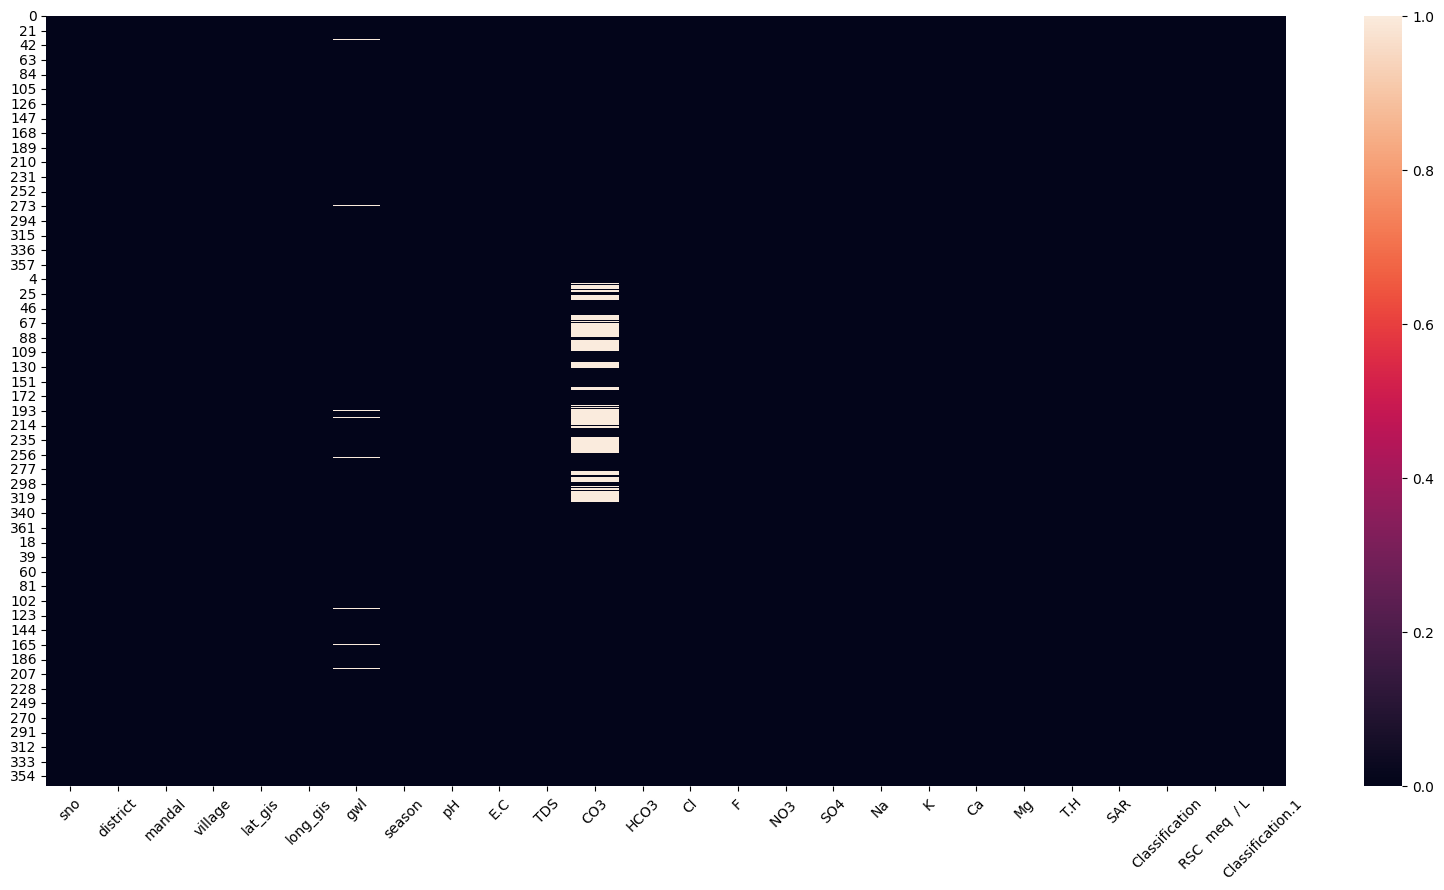

In [124]:
plt.figure(figsize=(20,10))     
sns.heatmap(df.isna()) 
plt.xticks(rotation=45)   
plt.show() 

In [125]:
(df.isna().sum()/df.shape[0] * 100).sort_values(ascending=True).round(2)

sno                  0.00
Classification       0.00
SAR                  0.00
T.H                  0.00
Mg                   0.00
Ca                   0.00
K                    0.00
Na                   0.00
SO4                  0.00
NO3                  0.00
F                    0.00
Cl                   0.00
HCO3                 0.00
TDS                  0.00
E.C                  0.00
pH                   0.00
season               0.00
long_gis             0.00
lat_gis              0.00
village              0.00
mandal               0.00
district             0.00
RSC  meq  / L        0.00
Classification.1     0.00
gwl                  0.99
CO3                 14.47
dtype: float64

<AxesSubplot: xlabel='CO3'>

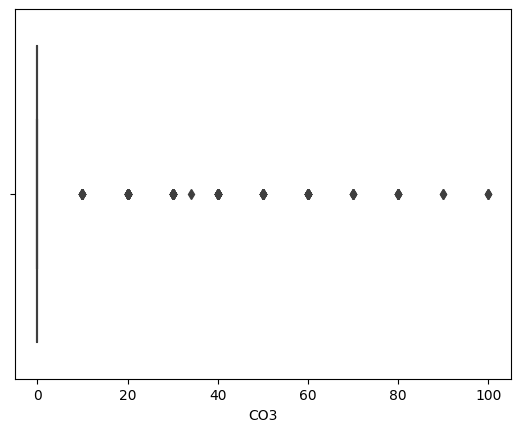

In [126]:
sns.boxplot(x=df['CO3'])  

In [127]:
df['CO3'].value_counts()

0.000      780
20.000      44
30.000      29
40.000      27
60.000      21
50.000      15
10.000      11
80.000       8
70.000       5
100.000      3
90.000       2
34.034       1
Name: CO3, dtype: int64

In [128]:
label_mapping = {
    'C2S1|C2S2|C2S2': 'Moderate',
    'C4S3|C4S2|C4S1|C4S4|C3S4': 'Bad',
    'C3S1|C3S2|C3S3': 'Poor',
    'C1S1' : 'Good'
}

df['Classification'] = df['Classification'].replace(label_mapping, regex=True)
df = df[df['Classification'].isin(label_mapping.values())]

In [129]:
label_encoder = LabelEncoder()
categorical_columns = ['Classification']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
print(df)

     sno  district        mandal       village    lat_gis   long_gis   gwl  \
0      1  ADILABAD      Adilabad      Adilabad  19.668300  78.524700  5.09   
1      2  ADILABAD   Bazarhatnur   Bazarhatnur  19.458888  78.350833  5.10   
2      3  ADILABAD   Gudihatnoor   Gudihatnoor  19.525555  78.512222  4.98   
3      4  ADILABAD       Jainath       Jainath  19.730555  78.640000  5.75   
4      5  ADILABAD       Narnoor       Narnoor  19.495665  78.852654  2.15   
..   ...       ...           ...           ...        ...        ...   ...   
363  375   YADADRI  S.Narayanpur  S.Narayanpur  17.144719  78.860010  9.90   
364  376   YADADRI   Thurkapally    Gandamalla  17.733101  78.853831  5.74   
365  377   YADADRI     Valigonda    T. somaram  17.399953  78.952290  1.72   
366  378   YADADRI     Valigonda   Vemulakonda  17.347782  79.143433  1.65   
367  379   YADADRI       Y.Gutta    Mallapuram  17.633555  78.911638  4.92   

                season    pH   E.C  ...    SO4      Na      K  

# Correlations

sno: Numéro de série ou d'identification unique pour chaque enregistrement.

district: District géographique où les données ont été collectées.

mandal: Sous-région administrative ou administrative dans le district.

village: Village ou zone géographique plus petite que le mandal.

lat_gis: Latitude géographique du point de collecte des données.

long_gis: Longitude géographique du point de collecte des données.

gwl: Niveau d'eau souterraine (Ground Water Level) mesuré.

season: Saison pendant laquelle les données ont été collectées.

pH: Mesure de l'acidité ou de l'alcalinité de l'eau.

E.C: Conductivité électrique, indiquant la capacité de l'eau à 
conduire le courant électrique.

SO4, Na, K, Ca, Mg: Concentrations en ions chimiques spécifiques.

T.H: Dureté totale de l'eau.

SAR: Sodium Adsorption Ratio, un indicateur de la qualité de l'eau pour l'irrigation.

Classification: Classification ou catégorisation de la qualité de l'eau

RSC: Residual Sodium Carbonate, un paramètre lié à la qualité de l'eau pour l'irrigation.

                     sno   lat_gis  long_gis       gwl       E.C       TDS  \
sno             1.000000 -0.165232 -0.206701  0.121915  0.057295  0.057295   
lat_gis        -0.165232  1.000000  0.111085 -0.078692 -0.287761 -0.287761   
long_gis       -0.206701  0.111085  1.000000 -0.229305 -0.071231 -0.071231   
gwl             0.121915 -0.078692 -0.229305  1.000000 -0.027097 -0.027097   
E.C             0.057295 -0.287761 -0.071231 -0.027097  1.000000  1.000000   
TDS             0.057295 -0.287761 -0.071231 -0.027097  1.000000  1.000000   
CO3            -0.043429 -0.166406  0.047127 -0.028778 -0.081422 -0.081422   
HCO3            0.027162 -0.191084 -0.054354 -0.007314  0.588617  0.588617   
Cl              0.082204 -0.263844 -0.090951 -0.019211  0.932253  0.932253   
F               0.077148 -0.095197 -0.014669  0.067777  0.077930  0.077930   
NO3            -0.014612 -0.191912  0.018474  0.000701  0.583265  0.583265   
SO4            -0.029660  0.161898  0.098371 -0.130906  0.401736

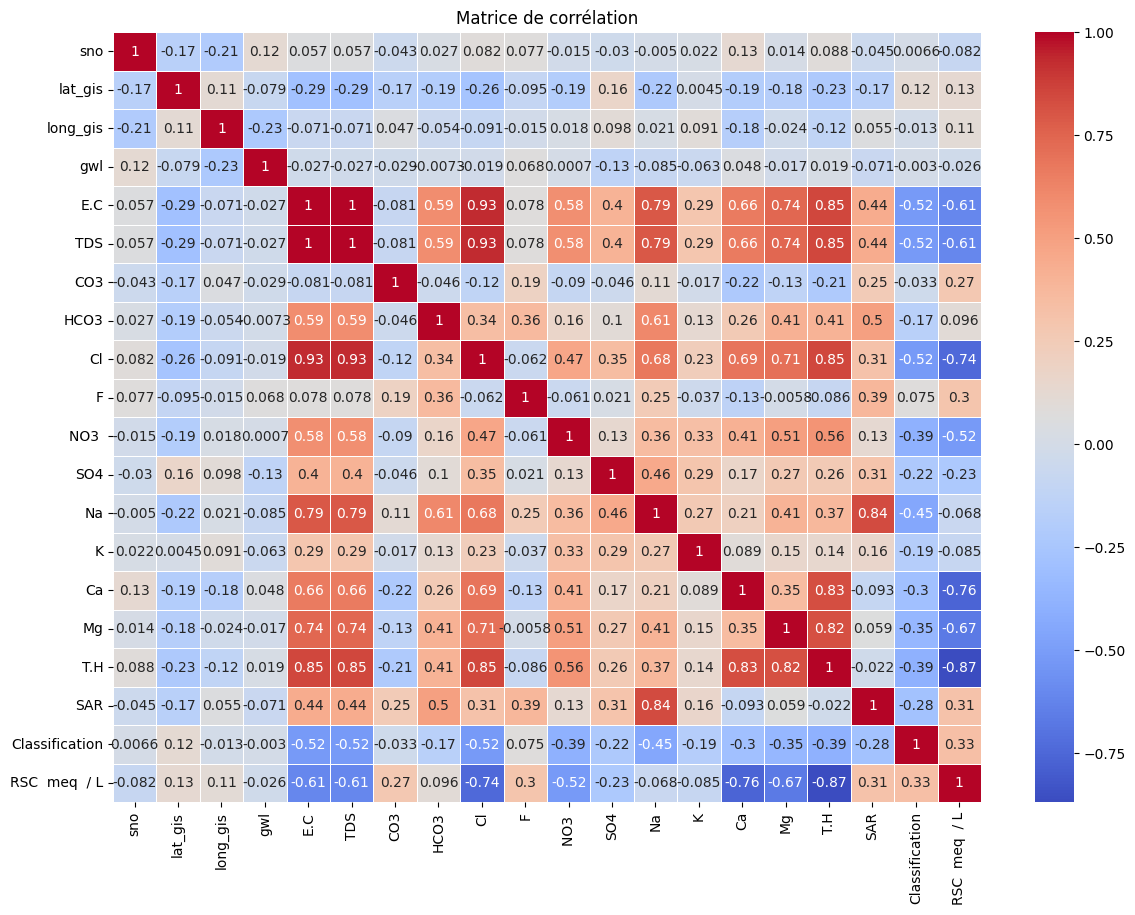

In [130]:
numeric_columns = df.select_dtypes(include=['number']).columns

correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix)

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Matrice de corrélation")
plt.show()

In [131]:
print(df.head()) 

   sno  district       mandal      village    lat_gis   long_gis   gwl  \
0    1  ADILABAD     Adilabad     Adilabad  19.668300  78.524700  5.09   
1    2  ADILABAD  Bazarhatnur  Bazarhatnur  19.458888  78.350833  5.10   
2    3  ADILABAD  Gudihatnoor  Gudihatnoor  19.525555  78.512222  4.98   
3    4  ADILABAD      Jainath      Jainath  19.730555  78.640000  5.75   
4    5  ADILABAD      Narnoor      Narnoor  19.495665  78.852654  2.15   

              season    pH   E.C  ...    SO4     Na    K    Ca      Mg  \
0  postmonsoon 2018   8.28   745  ...   46.0   49.0  4.0  48.0  38.896   
1  postmonsoon 2018   8.29   921  ...   68.0   42.0  5.0  56.0  63.206   
2  postmonsoon 2018   7.69   510  ...   44.0   45.0  2.0  24.0  38.896   
3  postmonsoon 2018   8.09   422  ...   35.0   27.0  1.0  32.0  19.448   
4  postmonsoon 2018   8.21  2321  ...  280.0  298.0  5.0  56.0  92.378   

          T.H       SAR  Classification  RSC  meq  / L  Classification.1  
0  279.934211  1.273328            

In [132]:
#Seuil corrélation
correlation_threshold = 0.7

high_correlation_cols = []
for col in correlation_matrix.columns:
    correlated_cols = correlation_matrix.index[(correlation_matrix[col] > correlation_threshold) | (correlation_matrix[col] < -correlation_threshold)]
    high_correlation_cols.extend(correlated_cols)

# Ici on supprime les doubles
high_correlation_cols = list(set(high_correlation_cols))

print("Colonnes avec une corrélation élevée :")
print(high_correlation_cols)

Colonnes avec une corrélation élevée :
['Classification', 'SO4', 'sno', 'Mg', 'long_gis', 'SAR', 'Ca', 'Cl', 'NO3 ', 'gwl', 'RSC  meq  / L', 'T.H', 'F', 'CO3', 'E.C', 'TDS', 'Na', 'lat_gis', 'K', 'HCO3']


### Selection des 10 features ayant la plus forte correlation 

In [133]:
correlation_pairs = []

# Obtention des paires de colonnes ainsi que leurs corrélations
for col in correlation_matrix.columns:
    correlated_cols = correlation_matrix.index[(correlation_matrix[col] > correlation_threshold) | (correlation_matrix[col] < -correlation_threshold)]
    for correlated_col in correlated_cols:
        correlation_pairs.append((col, correlated_col, abs(correlation_matrix.loc[col, correlated_col])))

# Tri par ordre décroissant de corrélation absolue
correlation_pairs.sort(key=lambda x: x[2], reverse=True)

top_correlation_pairs = correlation_pairs[:10]

top_correlation_cols = list(set([col for pair in top_correlation_pairs for col in pair[:2]]))

print("Les 10 colonnes les plus corrélées :")
print(top_correlation_cols)

Les 10 colonnes les plus corrélées :
['sno', 'long_gis', 'CO3', 'E.C', 'lat_gis', 'gwl', 'TDS', 'HCO3']


### Création du dataframe final (10 features)

In [134]:
# Colonnes avec une corrélation élevée
high_correlation_columns = ['Cl', 'F', 'TDS', 'HCO3', 'lat_gis', 'long_gis', 'sno', 'E.C', 'gwl']

# DataFrame avec les colonnes sélectionnées en conservant la colonne Classification
selected_columns_df = df[high_correlation_columns + ['Classification']]

print(selected_columns_df.head())


    Cl     F      TDS   HCO3    lat_gis   long_gis  sno   E.C   gwl  \
0   60  0.44   476.80  220.0  19.668300  78.524700    1   745  5.09   
1   80  0.56   589.44  230.0  19.458888  78.350833    2   921  5.10   
2   30  0.66   326.40  200.0  19.525555  78.512222    3   510  4.98   
3   10  0.58   270.08  160.0  19.730555  78.640000    4   422  5.75   
4  340  2.56  1485.44  300.0  19.495665  78.852654    5  2321  2.15   

   Classification  
0               2  
1               3  
2               2  
3               2  
4               0  


## Données manquantes

In [135]:
# Remplacer les valeurs manquantes dans la colonne "gwl" par la moyenne de cette colonne
selected_columns_df.loc[selected_columns_df['gwl'].isnull(), 'gwl'] = selected_columns_df['gwl'].mean()

## Outliers

In [136]:
# Définition d'une fonction pour traiter les valeurs aberrantes en utilisant la méthode IQR
def remove_outliers_iqr(df, column, lower_percentile=0.25, upper_percentile=0.75):
    # Calcul des valeurs du 1er et 3e quartile
    q1_value = df[column].quantile(lower_percentile)
    q3_value = df[column].quantile(upper_percentile)
    
    # Calcul de la plage interquartile (IQR)
    iqr_range = q3_value - q1_value
    
    # Définition des seuils inférieur et supérieur pour détecter les valeurs aberrantes
    lower_threshold = q1_value - 1.5 * iqr_range
    upper_threshold = q3_value + 1.5 * iqr_range
    
    # Filtrage du DataFrame en ne gardant que les valeurs à l'intérieur des seuils définis
    filtered_df = df[(df[column] >= lower_threshold) & (df[column] <= upper_threshold)]
    return filtered_df

# Traitement des valeurs aberrantes pour chaque colonne dans selected_columns_df
for column in selected_columns_df.columns:
    # On exclut la colonne 'Classification' qui est notre variable cible
    if column != 'Classification':
        # Appel de la fonction remove_outliers_iqr pour la colonne en cours
        selected_columns_df = remove_outliers_iqr(selected_columns_df, column)
    
# Affichage des dimensions de selected_columns_df après le traitement des valeurs aberrantes
print("Dimensions de selected_columns_df après le traitement des valeurs aberrantes :", selected_columns_df.shape)

Dimensions de selected_columns_df après le traitement des valeurs aberrantes : (941, 10)


 ### Séparation des données en ensembles d'entraînement et de test :

In [137]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
train_df, test_df = train_test_split(selected_columns_df, test_size=0.2, random_state=42)

# Afficher les dimensions des ensembles d'entraînement et de test
print("Dimensions de l'ensemble d'entraînement :", train_df.shape)
print("Dimensions de l'ensemble de test :", test_df.shape)


Dimensions de l'ensemble d'entraînement : (752, 10)
Dimensions de l'ensemble de test : (189, 10)


### Normalisation et/ou mise à l'échelle 

In [138]:
import numpy as np

numeric_columns = ['Cl', 'F', 'TDS', 'HCO3', 'lat_gis', 'long_gis', 'sno', 'E.C', 'gwl']

for column in numeric_columns:
    selected_columns_df[column] = np.log1p(selected_columns_df[column])

print(selected_columns_df.head())

         Cl         F       TDS      HCO3   lat_gis  long_gis       sno  \
0  4.110874  0.364643  6.169192  5.398163  3.028601  4.376068  0.693147   
1  4.394449  0.444686  6.380868  5.442418  3.018417  4.373879  1.098612   
2  3.433987  0.506818  5.791183  5.303305  3.021671  4.375911  1.386294   
3  2.397895  0.457425  5.602414  5.081404  3.031609  4.377516  1.609438   
4  5.831882  1.269761  7.304139  5.707110  3.020213  4.380183  1.791759   

        E.C       gwl  Classification  
0  6.614726  1.806648               2  
1  6.826545  1.808289               3  
2  6.236370  1.788421               2  
3  6.047372  1.909543               2  
4  7.750184  1.147402               0  


### Split

In [139]:
X = selected_columns_df.drop('Classification', axis=1)
y = selected_columns_df['Classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

models = [
    LogisticRegression(max_iter=10000),
    DecisionTreeClassifier(),
    SVC(max_iter=10000),
    RandomForestClassifier(),
    XGBClassifier()
]

# Boucle sur les modèles, pour simplifier
for model in models:
    model.fit(X_train, y_train_encoded)
    predictions = model.predict(X_test)
    
    print(f"{model.__class__.__name__}:")
    print("Accuracy:", accuracy_score(y_test_encoded, predictions))
    print("Precision:", precision_score(y_test_encoded, predictions, average='weighted',zero_division=1))
    print("Recall:", recall_score(y_test_encoded, predictions, average='weighted'))
    print("F1 Score:", f1_score(y_test_encoded, predictions, average='weighted'))

LogisticRegression:
Accuracy: 0.9417989417989417
Precision: 0.943343760862009
Recall: 0.9417989417989417
F1 Score: 0.9363273378143265
DecisionTreeClassifier:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
SVC:
Accuracy: 0.9206349206349206
Precision: 0.9239891896007005
Recall: 0.9206349206349206
F1 Score: 0.9006829654636133
RandomForestClassifier:
Accuracy: 0.9947089947089947
Precision: 0.9952968841857731
Recall: 0.9947089947089947
F1 Score: 0.9948545535662511


XGBClassifier:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


## KFOLD

In [140]:
# Diviser les données en ensembles d'entraînement et de test
X = selected_columns_df.drop('Classification', axis=1)  # Caractéristiques
y = selected_columns_df['Classification']  # Cible

# Initialiser les modèles
logreg_model = LogisticRegression(max_iter=5000) # Max_iter pour augmenter le nombre d'itérations, sinon des erreurs sont affichés, bien que le résultat soit correct
decision_tree_model = DecisionTreeClassifier()
svc_model = SVC(max_iter=1000)
random_forest_model = RandomForestClassifier()
xgb_model = XGBClassifier(max_iter=1000)

models = [logreg_model, decision_tree_model, svc_model, random_forest_model, xgb_model]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for model in models:
    print(f"Model: {model.__class__.__name__}")
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]
        
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions, average='weighted', zero_division=1)
        recall = recall_score(y_test, predictions, average='weighted')
        f1 = f1_score(y_test, predictions, average='weighted')
        
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
    
    print("Moyenne Accuracy:", sum(accuracies) / len(accuracies))
    print("Moyenne Precision:", sum(precisions) / len(precisions))
    print("Moyenne Recall:", sum(recalls) / len(recalls))
    print("Moyenne F1 Score:", sum(f1_scores) / len(f1_scores))
    print("----------")

Model: LogisticRegression
Moyenne Accuracy: 0.974496228751548
Moyenne Precision: 0.974862498090611
Moyenne Recall: 0.974496228751548
Moyenne F1 Score: 0.9705452318247627
----------
Model: DecisionTreeClassifier
Moyenne Accuracy: 0.9936170212765958
Moyenne Precision: 0.9940497667226392
Moyenne Recall: 0.9936170212765958
Moyenne F1 Score: 0.993551946371659
----------
Model: SVC
Moyenne Accuracy: 0.9436620511088597
Moyenne Precision: 0.9469798676717043
Moyenne Recall: 0.9436620511088597
Moyenne F1 Score: 0.9163487187597976
----------
Model: RandomForestClassifier
Moyenne Accuracy: 0.9946864797928627
Moyenne Precision: 0.9948514799137872
Moyenne Recall: 0.9946864797928627
Moyenne F1 Score: 0.9944874315348671
----------
Model: XGBClassifier
[12:50:45] WARNING: ../src/learner.cc:767: 
Parameters: { "max_iter" } are not used.

[12:50:45] WARNING: ../src/learner.cc:767: 
Parameters: { "max_iter" } are not used.

[12:50:45] WARNING: ../src/learner.cc:767: 
Parameters: { "max_iter" } are not use

## Validation croisée

In [141]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Diviser les données en caractéristiques (X) et cible (y)
X = selected_columns_df.drop('Classification', axis=1)
y = selected_columns_df['Classification']

# Initialiser les modèles
models = [
    LogisticRegression(max_iter=5000),
    DecisionTreeClassifier(),
    SVC(max_iter=1000),
    RandomForestClassifier(),
    XGBClassifier(max_iter=1000)
]

# Définir les métriques d'évaluation
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score, average='weighted',zero_division=1),
    'Recall': make_scorer(recall_score, average='weighted'),
    'F1 Score': make_scorer(f1_score, average='weighted')
}

# Boucle à travers les modèles et évaluez-les avec la validation croisée
for model in models:
    cv_results = cross_validate(model, X, y_encoded, cv=5, scoring=scoring)
    model_name = model.__class__.__name__
    print(f"Model: {model_name}")
    for metric_name in scoring.keys():
        scores_list = cv_results[f'test_{metric_name}']
        print(f"Mean {metric_name}:", scores_list.mean())
        print(f"Standard Deviation {metric_name}:", scores_list.std())
    print()


Model: LogisticRegression
Mean Accuracy: 0.976618259596983
Standard Deviation Accuracy: 0.0072220212811263855
Mean Precision: 0.9760046435494013
Standard Deviation Precision: 0.008050330042316535
Mean Recall: 0.976618259596983
Standard Deviation Recall: 0.0072220212811263855
Mean F1 Score: 0.9741006960028189
Standard Deviation F1 Score: 0.008308795361170098

Model: DecisionTreeClassifier
Mean Accuracy: 0.9925644489474277
Standard Deviation Accuracy: 0.0025921137520124693
Mean Precision: 0.9930830886539314
Standard Deviation Precision: 0.002405219277228166
Mean Recall: 0.9925644489474277
Standard Deviation Recall: 0.0025921137520124693
Mean F1 Score: 0.9926660022015202
Standard Deviation F1 Score: 0.0025104973653030647

Model: SVC
Mean Accuracy: 0.9436789372959586
Standard Deviation Accuracy: 0.002557785145048909
Mean Precision: 0.9468575416649194
Standard Deviation Precision: 0.0022723031551643525
Mean Recall: 0.9436789372959586
Standard Deviation Recall: 0.002557785145048909
Mean F1 S

# HYPERPARAMETRE

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
X = selected_columns_df.drop('Classification', axis=1)
y = selected_columns_df['Classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser les modèles
logreg_model = LogisticRegression(max_iter=10000)
decision_tree_model = DecisionTreeClassifier()
svc_model = SVC(max_iter=10000)
random_forest_model = RandomForestClassifier()
xgb_model = XGBClassifier()

# Liste de modèles pour l'ajustement des hyperparamètres
models = [logreg_model, decision_tree_model, svc_model, random_forest_model, xgb_model]

# Liste des hyperparamètres à tester pour chaque modèle
param_grids = [
    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'sag', 'newton-cg']},  # Logistic Regression
    {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},  # Decision Tree Classifier
    {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']},  # Support Vector Classifier
    {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]},  # Random Forest Classifier
    {'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 200]}  # XGBoost Classifier
]

# Mesures de performance à évaluer
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score, average='weighted', zero_division=1),
    'Recall': make_scorer(recall_score, average='weighted'),
    'F1 Score': make_scorer(f1_score, average='weighted')
}

# Boucle à travers les modèles
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train, y_train_encoded)
    print(f"{model_name}:")
    # Prédire sur l'ensemble de test
    y_pred = model.predict(X_test)
    print("Test Accuracy:", accuracy_score(y_test_encoded, y_pred))
    print("Test Precision:", precision_score(y_test_encoded, y_pred, average='weighted', zero_division=1))
    print("Test Recall:", recall_score(y_test_encoded, y_pred, average='weighted'))
    print("Test F1 Score:", f1_score(y_test_encoded, y_pred, average='weighted'))
    print()


LogisticRegression:
Test Accuracy: 0.9417989417989417
Test Precision: 0.943343760862009
Test Recall: 0.9417989417989417
Test F1 Score: 0.9363273378143265

DecisionTreeClassifier:
Test Accuracy: 0.9947089947089947
Test Precision: 0.9952968841857731
Test Recall: 0.9947089947089947
Test F1 Score: 0.9948545535662511

SVC:
Test Accuracy: 0.9206349206349206
Test Precision: 0.9239891896007005
Test Recall: 0.9206349206349206
Test F1 Score: 0.9006829654636133

RandomForestClassifier:
Test Accuracy: 0.9947089947089947
Test Precision: 0.9952968841857731
Test Recall: 0.9947089947089947
Test F1 Score: 0.9948545535662511

XGBClassifier:
Test Accuracy: 1.0
Test Precision: 1.0
Test Recall: 1.0
Test F1 Score: 1.0



# Meilleurs hyperparamètres par type de modèle utilisé dans le code :
### Régression Logistique
- Paramètre C: 100
- Solver: 'newton-cg'
- Nombre maximal d'itérations : 1000

### Arbre de Décision
- Profondeur maximale: Non spécifiée (utilisation des paramètres par défaut)
- Nombre minimal d'échantillons pour diviser un nœud: 2

### Classificateur à Vecteurs de Support (SVC)
- Paramètre C: 10
- Noyau: 'poly'
- Nombre maximal d'itérations: 1000

### Forêt Aléatoire
- Profondeur maximale: Non spécifiée (utilisation des paramètres par défaut)
- Nombre d'estimateurs: 100

### XGBoost
- Taux d'apprentissage: 0.01
- Profondeur maximale: 3
- Nombre d'estimateurs: 50